# PandasAI2

# 1.환경준비

## (1) 라이브러리 설치

In [ ]:
!pip install pandasai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.5/134.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.5/257.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.


* 설치 후 런타임 재시작

## (2) 라이브러리 Import

In [ ]:
import pandas as pd
import numpy as np
from pandasai import SmartDataframe
from pandasai import SmartDatalake

from pandasai.llm import OpenAI

In [ ]:
# openai key
api_key = 'your key'

# 2.SmartDatalake

## (1) 데이터 준비

* DataFrame

In [ ]:
employees_data = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Name': ['John', 'Emma', 'Liam', 'Olivia', 'William'],
    'Department': ['HR', 'Sales', 'IT', 'HR', 'IT']
}

salaries_data = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Salary': [5000, 6000, 4500, 7000, 5500]
}

employees = pd.DataFrame(employees_data)
salaries = pd.DataFrame(salaries_data)

display(employees)
display(salaries)

,EmployeeID,Name,Department
0,1,John,HR
1,2,Emma,Sales
2,3,Liam,IT
3,4,Olivia,HR
4,5,William,IT


,EmployeeID,Salary
0,1,5000
1,2,6000
2,3,4500
3,4,7000
4,5,5500


* SmartDatalake 생성

In [ ]:
llm = OpenAI(api_token=api_key)
sdl = SmartDatalake([employees, salaries], config={"llm": llm})

## (2) 사용하기

In [ ]:
sdl.chat("Salary가 가장 높은 직원은?")

The employee with the highest salary is Olivia from the Marketing department with a salary of 7000.


In [ ]:
sdl.chat("부서별 평균 Salary?")

,Department,Salary
0,Finance,5500.0
1,HR,5000.0
2,IT,4500.0
3,Marketing,7000.0
4,Sales,6000.0


# 3.실습

* 주어진 데이터에 대해, 질의(query)를 통해 데이터를 살펴보고 분석해 봅시다.

## (1) 데이터 준비

In [ ]:
# 데이터 불러오기
customers = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/customers2.csv')
products = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/products.csv')
sales = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/sales.csv')

# 날짜타입으로 변경하기
customers['RegisterDate'] = pd.to_datetime(customers['RegisterDate'])
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])

In [ ]:
sales.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,107,2,2016-01-02,p1036481,2,2100,c150417
1,69,1,2016-01-02,p1152861,1,1091,c212716
2,69,7,2016-01-02,p1013161,1,2600,c212716
3,69,8,2016-01-02,p1005771,1,1650,c212716
4,69,11,2016-01-02,p1089531,1,2600,c212716


In [ ]:
products.head()

,ProductID,ProductName,Category,SubCategory
0,p1052661,새우깡,간식,과자
1,p1054261,고구마스틱,간식,과자
2,p1097821,짱구,간식,과자
3,p1097831,감자칩,간식,과자
4,p1119071,뿌셔뿌셔,간식,과자


In [ ]:
customers.head()

,CustomerID,RegisterDate,Gender,BirthYear
0,c328222,2014-09-25,F,1960
1,c281448,2013-06-18,F,1974
2,c038336,2003-10-10,F,1968
3,c084237,2007-03-09,F,1982
4,c162600,2010-06-14,F,1978


* SmartDatalake 생성하기

In [ ]:
retail = SmartDatalake([customers, products, sales], config={"llm": llm})

## (2) 매출 분석

* 매출 분석을 위한 질문들을 살펴봅시다.

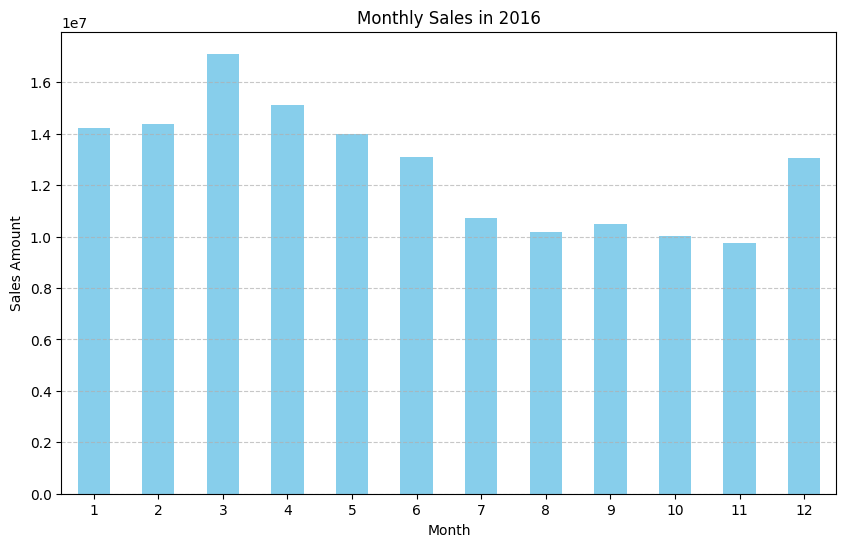

ERROR:pandasai.helpers.logger:Pipeline failed on step 5: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 281, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 115, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 29, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
query = '2016년 월 별 판매액을 막대그래프로 그려줘'
retail.chat(query)

In [ ]:
query = 'Category별 총 sales 합계를 조회해. 데이터프레임형태로'
retail.chat(query)

,Category,TotalSales
0,간식,68277148
1,과일,62603857
2,반찬류,50634086
3,유제품,78960786
4,채소,78073297


In [ ]:
query = '가장 많이 팔린 ProductName 상위 5개와 총 qty 합계 조회'
retail.chat(query)

,ProductName,Qty
0,콩나물,5437
1,두부_대,5194
2,우유1000,4058
3,두부_소,3963
4,파,3022


In [ ]:
query = '요일별 카테고리별 매출액 조회'
retail.chat(query)

OrderDate,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Category,,,,,,,
간식,2340938,1570058,1973605,938341,2054118,2014965,2028545
과일,8284638,8794111,5665876,4708478,6699165,7437329,8199742
반찬류,4643013,6167717,4148834,2737052,4742486,4778196,4987522
유제품,6463240,8727853,5850756,4528897,6133133,6378459,7179618
채소,8662169,9608595,9024866,5483638,7084280,8370762,6588473


## (3) 고객 분석
* 주어진 데이터를 활용하여 고객에 대한 분석을 시도해 봅시다.
* 고객의 연령대, 가입기간 등에 따른 매출 분석을 다양하게 시도해 봅시다.

In [ ]:
retail = SmartDatalake([customers, products, sales], config={"llm": llm})

In [ ]:
query = '올해가 2017년이라고 할때, 고객의 나이를 계산하고 연령대로 변환해줘. 그다음 연령대별 매출액 조회'
retail.chat(query)

,AgeGroup,Amt
0,0-20,4364
1,21-30,1335265
2,31-40,41140414
3,41-50,104398517
4,51-60,33385327
5,61-70,10466001
6,71-80,4212173
7,81-90,57407
8,91-100,0


In [ ]:
query = '연령대별 카테고리별 구매액을 피봇테이블로 조회'
retail.chat(query)

Category,간식,과일,반찬류,유제품,채소
AgeGroup,,,,,
0-20,0,0,0,0,4364
21-30,78742,359170,266235,256368,374750
31-40,3217072,10270160,5678246,10220952,11753984
41-50,7410338,26901891,15357813,26571200,28157275
51-60,1760134,8390356,6824583,6505891,9904363
61+,454284,3867762,4077943,1707545,4628047
